In [3]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv


In [4]:

load_dotenv()

True

In [6]:
model = ChatGoogleGenerativeAI(
    model="gemini-pro",
    temperature=0.3
)
# Temperature decides how predictable or creative the AI’s answer is (low = safe, high = creative).

In [7]:
class LLMState(TypedDict):
    question : str
    answer : str

In [8]:
def llm_qa(state: LLMState)->LLMState:

    question = state["question"]

    prompt = f'Answer the following question in a concise manner: {question}'

    answer = model.invoke(prompt).content
    # This line sends your prompt to the AI model and stores only the generated text response in answer.
    state['answer'] = answer

    return state

In [9]:

# create our graph
graph = StateGraph(LLMState)
#add the graph nodes
graph.add_node('llm_qa',llm_qa)
#add the graph edges
graph.add_edge(START,'llm_qa')
graph.add_edge('llm_qa',END)

In [10]:
# compile the graph
workflow = graph.compile()

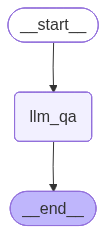

In [11]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [12]:
# take question from user
question = input("Ask your question: ")

# create initial state
initial_state = {
    "question": question
}

# run the graph
final_state = workflow.invoke(initial_state)
# This line runs the LangGraph workflow starting from START, passes in initial_state, executes each node in order, and returns the final updated state when it reaches END.

# show answer
print("\nAnswer:")
print(final_state["answer"])


ChatGoogleGenerativeAIError: Error calling model 'gemini-pro' (NOT_FOUND): 404 NOT_FOUND. {'error': {'code': 404, 'message': 'models/gemini-pro is not found for API version v1beta, or is not supported for generateContent. Call ListModels to see the list of available models and their supported methods.', 'status': 'NOT_FOUND'}}